<a href="https://colab.research.google.com/github/1devansh/Video-classification-safe-violent/blob/master/Deep_Learning_Project_Set_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Files**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import InceptionV3
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, UpSampling2D
from keras import backend as K

import random

import subprocess
import os
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow, figure
import cv2
import math


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from numpy import *
import theano



In [0]:

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
cd /gdrive/My Drive/sem 6 deep Learning/projectDataset/C

/gdrive/My Drive/sem 6 deep Learning/projectDataset/C


In [0]:
ls

C_10.mp4  C_12.mp4  C_14.mp4  C_2.mp4  C_4.mp4  C_6.mp4  C_9.mp4
C_11.mp4  C_13.mp4  C_1.mp4   C_3.mp4  C_5.mp4  C_8.mp4


In [0]:
mkdir projectDatasetimages

In [0]:
cd ..

/gdrive/My Drive/sem 6 deep Learning


In [0]:
ls

test.mov


In [0]:
path_test = "/gdrive/My Drive/sem 6 deep Learning/projectDataset/C"


In [0]:
testList = os.listdir(path_test)

In [0]:
ls

C_10.mp4  C_12.mp4  C_14.mp4  C_2.mp4  C_4.mp4  C_6.mp4  C_8.mp4
C_11.mp4  C_13.mp4  C_1.mp4   C_3.mp4  C_5.mp4  C_7.mp4  C_9.mp4


In [0]:
print(testList)

['C_6.mp4', 'C_7.mp4', 'C_8.mp4', 'C_9.mp4', 'C_10.mp4', 'C_11.mp4', 'C_12.mp4', 'C_13.mp4', 'C_14.mp4', 'C_5.mp4', 'C_4.mp4', 'C_3.mp4', 'C_2.mp4', 'C_1.mp4']


## **Renaming Dataset**

In [0]:
#renaming files in order
i = "1"
for file in testList:
  try:
    i = str(i)
    final = "A_" + i + ".avi"
    
    os.rename(file,final)
    i = int(i)
    i = i+1
  except FileNotFoundError:
    continue

In [0]:
x=1

## **Extracting frames from dataset**

In [0]:
#extracting frames from videos C

path = "/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/"
for file in testList:
  videoFile = path + file
  print(videoFile)
  cap = cv2.VideoCapture(videoFile)
  frameRate = cap.get(5) #frame rate
  
  while(cap.isOpened()):
      frameId = cap.get(1) #current frame number
      ret, frame = cap.read()
      if (ret != True):
          break
      if (frameId % math.floor(frameRate) == 0):
          filename = '/gdrive/My Drive/sem 6 deep Learning/projectDatasetimages/C_' +  str(int(x)) + ".jpg"
          x=x+1
          cv2.imwrite(filename, frame)

  cap.release()
  print ("Done!")






/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_6.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_7.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_8.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_9.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_10.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_11.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_12.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_13.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_14.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_5.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_4.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_3.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_2.mp4
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/C/C_1.mp4
Done!


In [0]:
x

198

In [0]:
#extracting frames from videos B

path = "/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/"
for file in testList:
  videoFile = path + file
  print(videoFile)
  cap = cv2.VideoCapture(videoFile)
  frameRate = cap.get(5) #frame rate
  
  while(cap.isOpened()):
      frameId = cap.get(1) #current frame number
      ret, frame = cap.read()
      if (ret != True):
          break
      if (frameId % math.floor(frameRate) == 0):
          filename = '/gdrive/My Drive/sem 6 deep Learning/projectDatasetimages/B_' +  str(int(x)) + ".jpg";x+=1
          cv2.imwrite(filename, frame)

  cap.release()
  print ("Done!")


/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_1.avi
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_2.avi
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_3.avi
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_4.avi
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_5.avi
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_6.avi
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_7.avi
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_8.avi
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_9.avi
Done!
/gdrive/My Drive/sem 6 deep Learning/projectDataset/B/B_10.avi
Done!


## **Resizing new image Dataset(frames)**

In [0]:
path_frames = "/gdrive/My Drive/sem 6 deep Learning/projectDatasetimages"


In [0]:
testFrames = os.listdir(path_frames)

In [0]:
print(len(testFrames))

308


In [0]:
for file in testFrames:
  
  im = Image.open(path_frames+ '/' +file)
  img = im.resize((200,200))
  
  
  img.save(path_framesOP +'/'+ file)

## **Creating Labels for Dataset**

In [0]:
path_framesOPa = "/gdrive/My Drive/sem 6 deep Learning/projectDatasetimagesResized/Safe"
path_framesOPb = "/gdrive/My Drive/sem 6 deep Learning/projectDatasetimagesResized/Potentially Suspicious"
path_framesOPc = "/gdrive/My Drive/sem 6 deep Learning/projectDatasetimagesResized/Violent Activity"

In [0]:
a1 = os.listdir(path_framesOPa)
b1 = os.listdir(path_framesOPb)
c1 = os.listdir(path_framesOPc)

In [0]:
print(len(a1))
lena = len(a1)

print(len(b1))
lenb = len(b1)

print(len(c1))
lenc = len(c1)

53
58
197


In [0]:
labelA = []
labelB = []
labelC = []

In [0]:
for i in range(lena):
  labelA.append(0)

for i in range(lenb):
  labelB.append(1)

for i in range(lenc):
  labelC.append(2)

In [0]:
print(labelA)
print(labelB)
print(labelC)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [0]:
afor i in range(308):
  if(dire[i].split('_')[0] != labels[i]):
    print("not same")

print(dire[i].split('_')[0])
print(dire[i])
print(labels[i])

C
C_99.jpg
C


In [0]:
print(path_framesOP + '/' +dire[0])

/gdrive/My Drive/sem 6 deep Learning/projectDatasetimagesResized/A_1.jpg


## **Modifying Dataset**

### **Modifying dataset for image generator**

In [0]:
print(dire)

['A_1.jpg', 'A_10.jpg', 'A_11.jpg', 'A_12.jpg', 'A_13.jpg', 'A_14.jpg', 'A_15.jpg', 'A_16.jpg', 'A_17.jpg', 'A_18.jpg', 'A_19.jpg', 'A_2.jpg', 'A_20.jpg', 'A_21.jpg', 'A_22.jpg', 'A_23.jpg', 'A_24.jpg', 'A_25.jpg', 'A_26.jpg', 'A_27.jpg', 'A_28.jpg', 'A_29.jpg', 'A_3.jpg', 'A_30.jpg', 'A_31.jpg', 'A_32.jpg', 'A_33.jpg', 'A_34.jpg', 'A_35.jpg', 'A_36.jpg', 'A_37.jpg', 'A_38.jpg', 'A_39.jpg', 'A_4.jpg', 'A_40.jpg', 'A_41.jpg', 'A_42.jpg', 'A_43.jpg', 'A_44.jpg', 'A_45.jpg', 'A_46.jpg', 'A_47.jpg', 'A_48.jpg', 'A_49.jpg', 'A_5.jpg', 'A_50.jpg', 'A_51.jpg', 'A_52.jpg', 'A_53.jpg', 'A_6.jpg', 'A_7.jpg', 'A_8.jpg', 'A_9.jpg', 'B_1.jpg', 'B_10.jpg', 'B_11.jpg', 'B_12.jpg', 'B_13.jpg', 'B_14.jpg', 'B_15.jpg', 'B_16.jpg', 'B_17.jpg', 'B_18.jpg', 'B_19.jpg', 'B_2.jpg', 'B_20.jpg', 'B_21.jpg', 'B_22.jpg', 'B_23.jpg', 'B_24.jpg', 'B_25.jpg', 'B_26.jpg', 'B_27.jpg', 'B_28.jpg', 'B_29.jpg', 'B_3.jpg', 'B_30.jpg', 'B_31.jpg', 'B_32.jpg', 'B_33.jpg', 'B_34.jpg', 'B_35.jpg', 'B_36.jpg', 'B_37.jpg', 'B_

In [0]:
safe = "/gdrive/My Drive/sem 6 deep Learning/projectDatasetimagesResized/Safe"
violentActivity = "/gdrive/My Drive/sem 6 deep Learning/projectDatasetimagesResized/Violent Activity"
Potential = "/gdrive/My Drive/sem 6 deep Learning/projectDatasetimagesResized/Potentially Suspicious"

In [0]:
for file in dire:
  if file.split('_')[0] == 'A':
    im = Image.open(path_framesOP+ '/' +file)
    
    im.save(safe +'/'+ file)
  elif file.split('_')[0] == 'B':
    im = Image.open(path_framesOP+ '/' +file)
    
    im.save(Potential +'/'+ file)
  elif file.split('_')[0] == 'C':
    im = Image.open(path_framesOP+ '/' +file)
    
    im.save(violentActivity +'/'+ file)



### **Inception model**

In [0]:
from array import array
from __future__ import unicode_literals

In [0]:
base_model=InceptionV3(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

87916544/87910968 [==============================] - 3s 0us/step


In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [0]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [0]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [0]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/sem 6 deep Learning/projectDatasetimagesResized',
                                                 target_size=(200,200),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 308 images belonging to 3 classes.


In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=(train_generator.n//train_generator.batch_size) * 3
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
308/308 [==============================] - 87s 283ms/step - loss: 0.0911 - accuracy: 0.9854
Epoch 2/10
308/308 [==============================] - 67s 219ms/step - loss: 0.1208 - accuracy: 0.9784
Epoch 3/10
308/308 [==============================] - 67s 217ms/step - loss: 0.0285 - accuracy: 0.9956
Epoch 4/10
308/308 [==============================] - 67s 218ms/step - loss: 0.0109 - accuracy: 0.9968
Epoch 5/10
308/308 [==============================] - 67s 217ms/step - loss: 0.1205 - accuracy: 0.9873
Epoch 6/10
308/308 [==============================] - 68s 220ms/step - loss: 0.1188 - accuracy: 0.9850
Epoch 7/10
308/308 [==============================] - 68s 220ms/step - loss: 0.0086 - accuracy: 0.9981
Epoch 8/10
308/308 [==============================] - 67s 216ms/step - loss: 0.0228 - accuracy: 0.9963
Epoch 9/10
308/308 [==============================] - 66s 216ms/step - loss: 0.0054 - accuracy: 0.9986
Epoch 10/10
308/308 [==============================] - 67s 216ms/step - l

In [0]:
model.predict()

9


In [0]:
immatrixtest = np.array([np.array(Image.open(path_framesOP+ '/' + img)).flatten()
for img in dire], 'f')

In [0]:
print(immatrixtest)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [ 89. 103.  88. ...  72.  91.  85.]
 [ 91. 110.  90. ...  68.  85.  77.]
 [ 94. 101.  83. ...  65.  87.  84.]]


In [0]:

print(size(immatrixtest))
print(shape(immatrixtest))
print(immatrixtest)

36960000
(308, 120000)
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [ 89. 103.  88. ...  72.  91.  85.]
 [ 91. 110.  90. ...  68.  85.  77.]
 [ 94. 101.  83. ...  65.  87.  84.]]


In [0]:
data, Label = shuffle(immatrixtest, labels, random_state = 2)
train_data = [data, Label]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


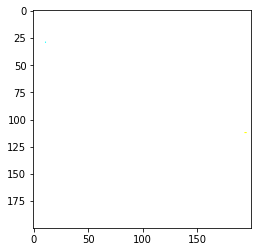

In [0]:
img = immatrixtest[24].reshape(200,200,3)
plt.imshow(img)

In [0]:
(X, y) = (train_data[0], train_data[1])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [0]:
print(y_train)
print(X_test)

num_train_examples = X_train
num_test_examples = X_test

['C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'C', 'B', 'C', 'A', 'A', 'C', 'A', 'C', 'C', 'B', 'C', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'A', 'B', 'A', 'C', 'C', 'C', 'C', 'A', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'A', 'C', 'C', 'B', 'A', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'A', 'C', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'A', 'B', 'C', 'C', 'C', 'B', 'C', 'B', 'C', 'C', 'C', 'A', 'C', 'C', 'C', 'A', 'C', 'C', 'B', 'A', 'C', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'A', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'B', 'B', 'C', 'C', 'B', 'A', 'C', 'A', 'C', 'C', 'C', 'B', 'C', 'B', 'C', 'C', 'C', 'A', 'C', 'C', 'A', 'C', 'A', 'A', 'A', 'B', 'C', 'C', 'C', 'A', 'C', 'B', 'C', 'A', 'B', 'A', 'C', 'C', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'B', 'C', 'B', 'C', 'A', 'C', 'C', 'B', 'A', 'B', 'C', 'C', 'C', 'C', 'C', 'A', 'C', 'C', 'C', 'C', 'A', 'B', 'C', 'C', 'B', 'C', 'A', 'C', 'B', 'B', 'B',

In [0]:
img_channel = 3
img_rows, img_columns = 200, 200

In [0]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_columns, img_channel)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_columns, img_channel)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(shape(X_train[100, 78]))
print(shape(X_train))

(200, 3)
(246, 200, 200, 3)


In [0]:
Y_train = np_utils.to_categorical(y_train, 3)
Y_test = np_utils.to_categorical(y_test, 3)

print(Y_train[100])
print(shape(Y_train))

[0. 1. 0.]
(246, 3)


In [0]:
#print(X_train[100,:,:,:])
print(y_train)

[2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0]


In [0]:
for i in range(len(y_test)):
  if y_test[i] == 'A':
    y_test[i] = 0
  elif y_test[i] == 'B':
    y_test[i] = 1
  elif y_test[i] == 'C':
    y_test[i] = 2 

## **Inception Model**

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
pre_trained_model = InceptionV3(input_shape = (200,200,3), include_top= False, weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [0]:
from tensorflow.keras.optimizers import RMSprop

#x = layers.Flatten()(pre_trained_model.output)
#x = layers.Dense(1024, activation = 'relu')(x)
#x = layers.Dropout(0.2)(x)
#x = layers.Dense(2048)
model = pre_trained_model([
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2048,  activation=tf.nn.softmax)
])


ValueError: ignored

In [0]:
batch_size = 32
nb_classes =2
nb_epochs = 10
img_rows, img_columns = 200, 200

In [0]:
batch_size = 32
nb_classes =52
nb_epochs = 10
img_rows, img_columns = 200, 200

In [0]:
pre_trained_model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
pre_trained_model.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, Y_test))

In [0]:
! git remote add origin "https://github.com/1devansh/Video-classification-safe-violent.git"

fatal: not a git repository (or any parent up to mount point /)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
